In [1]:
import os 
os.listdir()

['datalab', '.local', '.config', '.rnd', '.cache', '.forever', '.ipython']

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [0]:
train = pd.read_csv('.kaggle/competitions/digit-recognizer/train.csv')

In [6]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
y = train['label']
train.drop(['label'],axis = 1, inplace= True)


In [0]:
x = np.array(train)

In [0]:
y = np.array(y)

In [10]:
x.shape, train.shape

((42000, 784), (42000, 784))

In [0]:
x_test, x = x[40000:],x[:40000]
y_test, y = y[40000:], y[:40000]

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x_test = sc.fit_transform(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
y.shape,y_test.shape

((40000,), (2000,))

In [0]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse=False)

onehot.fit(y.reshape(-1,1))
y_one, ytest_one = onehot.fit_transform(y.reshape(-1,1)), onehot.fit_transform(y_test.reshape(-1,1)) 

In [15]:
x.shape,x_test.shape

((40000, 784), (2000, 784))

In [0]:
trainx = np.zeros((40000,28,28,1))
testx = np.zeros((2000,28,28,1))


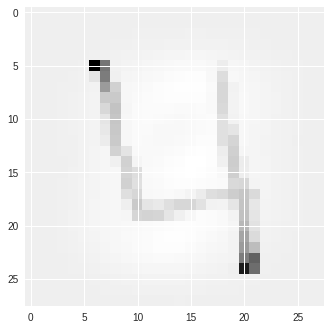

In [38]:
import matplotlib.pyplot as plt
plt.imshow(x[3].reshape(28,28))

In [0]:
for i in range(40000):
  trainx[i,:] = x[i].reshape(28,28,1)

In [69]:
trainx[0].shape

(28, 28, 1)

In [0]:
for i in range(2000):
  testx[i,:] = x_test[i].reshape(28,28,1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D


In [0]:
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(28, 28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [93]:
model.fit(trainx, y_one, validation_data=(testx,ytest_one ), epochs=10, batch_size=200)

Train on 40000 samples, validate on 2000 samples
Epoch 1/10
40000/40000 [==============================] - 3s 84us/step - loss: 0.4287 - acc: 0.8695 - val_loss: 0.1029 - val_acc: 0.9670
Epoch 2/10
40000/40000 [==============================] - 3s 79us/step - loss: 0.0973 - acc: 0.9698 - val_loss: 0.0778 - val_acc: 0.9765
Epoch 3/10
40000/40000 [==============================] - 3s 79us/step - loss: 0.0660 - acc: 0.9787 - val_loss: 0.0487 - val_acc: 0.9875
Epoch 4/10
40000/40000 [==============================] - 3s 76us/step - loss: 0.0516 - acc: 0.9839 - val_loss: 0.0498 - val_acc: 0.9830
Epoch 5/10
29200/40000 [====================>.........] - ETA: 0s - loss: 0.0425 - acc: 0.985840000/40000 [==============================] - 3s 76us/step - loss: 0.0442 - acc: 0.9853 - val_loss: 0.0509 - val_acc: 0.9845
Epoch 6/10
40000/40000 [==============================] - 3s 76us/step - loss: 0.0381 - acc: 0.9876 - val_loss: 0.0434 - val_acc: 0.9840
Epoch 7/10
40000/40000 [======================

In [0]:
test = pd.read_csv('.kaggle/competitions/digit-recognizer/test.csv')

In [0]:
test = np.array(test)

In [0]:
test_data = np.zeros((test.shape[0],28,28,1))

In [0]:
for i in range(test.shape[0]):
  test_data[i,:] = test[i].reshape(28,28,1) 

In [0]:
preds = model.predict(test_data)

In [0]:
preds_arg = np.argmax(preds,axis = 1)

In [0]:
sub = pd.read_csv('.kaggle/competitions/digit-recognizer/sample_submission.csv')

In [86]:
sub.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [0]:
sub['Label'] = preds_arg

In [88]:
sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [0]:
sub.to_csv('result.csv', index = False)

In [98]:
!kaggle competitions submit -c digit-recognizer -f result.csv -m 'conv with dropout'

Successfully submitted to Digit Recognizer

In [0]:
'''this submission gave 97.25% accuracy'''